In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# MODELING:

from sklearn.metrics import mean_squared_error, r2_score , mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree  import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor , AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression , Ridge , Lasso , ElasticNet
from sklearn.model_selection import RandomizedSearchCV , train_test_split
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings
warnings.filterwarnings('ignore')

In [11]:
data =  pd.read_csv(r"C:\Users\Deepraj\Desktop\Projects\src\notebook\data\data.csv")

In [12]:
data.head(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [14]:
x = data.drop(columns=['math score'] , axis = 1)
y = data['math score']

In [19]:
num_feat = [col  for col  in x.columns if data[col].dtype != 'O']
cat_feat = [col for col  in x.columns  if data[col].dtype == 'O']

In [23]:
from sklearn.compose  import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

ct  = ColumnTransformer(
    [('One Hot Encoding', OneHotEncoder(), cat_feat),
     ('Standard scaler',  StandardScaler(), num_feat)
     ]
)
x = ct.fit_transform(x)


In [26]:
x_train , x_test, y_train , y_test = train_test_split(x,y,test_size=0.2,random_state=42)
print(x_train.shape , x_test.shape)

(800, 19) (200, 19)


In [27]:
import math
def eval(y_test,y_pred):
    mae = mean_absolute_error(y_test,y_pred)
    mse = mean_squared_error(y_test,y_pred)
    r2_square =r2_score(y_test,y_pred)
    rmse = math.sqrt(mean_squared_error(y_test,y_pred))
    return mae,mse,rmse,r2_square


In [37]:
models ={
    'LinearRegression' : LinearRegression,
    'Ridge' : Ridge,
    'Lasso' : Lasso,
    'ElasticNet' : ElasticNet,
    'KNN' : KNeighborsRegressor,
    'DecisionTree' : DecisionTreeRegressor,
    'Random Forest' : RandomForestRegressor,
    'AdaBoost' : AdaBoostRegressor,
    'Catboost' : CatBoostRegressor,
    'XGBoost': XGBRegressor
}

model_list = list(models.values())
model_keys = list(models.keys())
model_name  = []
r2_square = []
mae_ = []
mse_ = []
rmse_ = []
for i in range(len(model_list)):
    curr_model = model_list[i]()
    curr_model.fit(x_train,y_train)

    #predictions:
    train = curr_model.predict(x_train)
    test = curr_model.predict(x_test)

    # Evaluation:
    train_mae , train_mse , train_rmse,  train_r2sq = eval(y_train,train)
    test_mae , test_mse , test_rmse,  test_r2sq = eval(y_test,test)

    print("Currennt Model: " ,  model_keys[i] , "\n")
    print("Model performance for Training data set \n")
    print(f"MSE = {train_mse}")
    print(f"MAE = {train_mae}")
    print(f"RMSE = {train_rmse}")
    print(f"R2_square = {train_r2sq}")
    print("\n")
    print("\n")
    print("------------------------------------")
    print("Model performance for Test data set \n")
    model_name.append(model_keys[i])
    print(f"MSE = {test_mse}")
    mse_.append(test_mse)
    print(f"MAE = {test_mae}")
    mae_.append(test_mae)
    print(f"RMSE = {test_rmse}")
    rmse_.append(test_rmse)
    print(f"R2_square = {test_r2sq}")
    r2_square.append(test_r2sq)
    print("\n")
    print("\n")


Currennt Model:  LinearRegression 

Model performance for Training data set 

MSE = 28.334870380648585
MAE = 4.266711846071957
RMSE = 5.323050852720513
R2_square = 0.8743172040139593




------------------------------------
Model performance for Test data set 

MSE = 29.095169866715484
MAE = 4.21476314247485
RMSE = 5.393993869732842
R2_square = 0.8804332983749565




Currennt Model:  Ridge 

Model performance for Training data set 

MSE = 28.33778823308244
MAE = 4.264987823725981
RMSE = 5.323324922741654
R2_square = 0.8743042615212909




------------------------------------
Model performance for Test data set 

MSE = 29.056272192348285
MAE = 4.21110068801426
RMSE = 5.390387016935638
R2_square = 0.8805931485028738




Currennt Model:  Lasso 

Model performance for Training data set 

MSE = 43.47840400585577
MAE = 5.206302661246526
RMSE = 6.593815587795565
R2_square = 0.8071462015863458




------------------------------------
Model performance for Test data set 

MSE = 42.5064168384116

In [45]:
ev = {
    'models' : model_name,
    'r2_square' : r2_square,
    'mae' : mae_,
    'mse' : mse_,
    'rmse' : rmse_

}

eval_matrix = pd.DataFrame(ev)
eval_matrix.sort_values(by='r2_square', ascending=False)


,models,r2_square,mae,mse,rmse
1,Ridge,0.880593,4.211101,29.056272,5.390387
0,LinearRegression,0.880433,4.214763,29.095170,5.393994
8,Catboost,0.851632,4.612532,36.103658,6.008632
7,AdaBoost,0.850458,4.692195,36.389262,6.032351
6,Random Forest,0.850366,4.664858,36.411653,6.034207
9,XGBoost,0.827797,5.057731,41.903706,6.473307
2,Lasso,0.825320,5.157882,42.506417,6.519695
4,KNN,0.783813,5.621000,52.606600,7.253041
5,DecisionTree,0.744923,6.270000,62.070000,7.878452
3,ElasticNet,0.739624,6.390112,63.359416,7.959863


Linear Regression good accuracy:

In [49]:
reg = LinearRegression()
reg.fit(x_train,y_train)
test = reg.predict(x_test)
score = r2_score(y_test,test)
print(f"Accuracy score of model: {score}")


Accuracy score of model: 0.8804332983749565


Text(0, 0.5, 'Predicted')

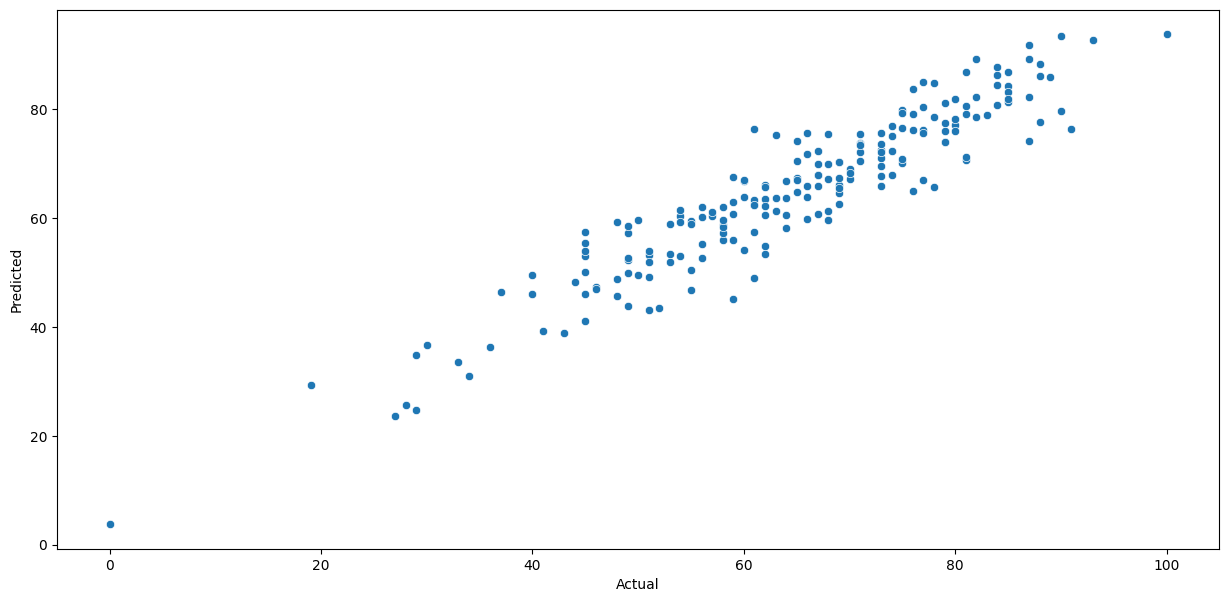

In [57]:
plt.figure(figsize=(15,7))
sns.scatterplot(x = y_test,y=  test)
plt.xlabel("Actual")
plt.ylabel("Predicted")


<Axes: xlabel='math score'>

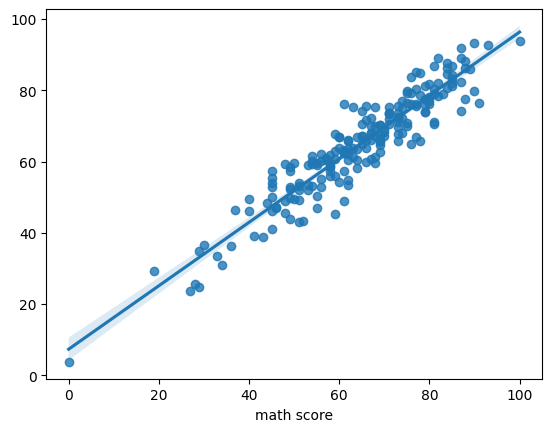

In [58]:
sns.regplot(x  = y_test , y = test)

Differnce  between actual and predicted values:

In [62]:
a = {
    "actual" : y_test,
    "predicted" : test,
    "difference" : y_test-test
}

diff = pd.DataFrame(a)
diff

,actual,predicted,difference
521,91,76.387970,14.612030
737,53,58.885970,-5.885970
740,80,76.990265,3.009735
660,74,76.851804,-2.851804
411,84,87.627378,-3.627378
...,...,...,...
408,52,43.409149,8.590851
332,62,62.152214,-0.152214
208,74,67.888395,6.111605
613,65,67.022287,-2.022287
